In [34]:
import numpy as np
import xarray as xr
import pandas as pd
from netCDF4 import Dataset
from wrf import (to_np, getvar, extract_times, ALL_TIMES)
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
xr.set_options(display_style='text')

In [10]:
datadir = '/global/cscratch1/sd/feng045/SAAG/June2018_May2019_nsp/'
filein_t1 = f'{datadir}wrfout_d01_2019-01-24_12:00:00'
filein_t2 = f'{datadir}wrfout_d01_2019-01-24_13:00:00'

In [13]:
# Create a list with the file pairs
wrflist = [Dataset(filein_t1), Dataset(filein_t2)]

# Extract the 'Times' variable
wrftimes = getvar(wrflist, 'Times', timeidx=ALL_TIMES, method='cat')

# Convert datetime object to WRF string format
Times_str_t1 = pd.to_datetime(wrftimes[0].data).strftime('%Y-%m-%d_%H:%M:%S')
print(Times_str_t1)
# Get the length of the string
strlen_t1 = len(Times_str_t1)

# Convert np.datetime64 to Epoch time in seconds since 1970-01-01T00:00:00 and put into a numpy array
ntimes = len(wrftimes)
basetimes = np.full(ntimes, np.NAN, dtype=float)
# Loop over each time
for tt in range(0, ntimes):
    basetimes[tt] = wrftimes[tt].values.tolist()/1e9

# Calculate basetime difference in [seconds]
delta_times = np.diff(basetimes)

2019-01-24_12:00:00


In [15]:
delta_times

array([3600.])

In [16]:
RAINNC = getvar(wrflist, 'RAINNC', timeidx=ALL_TIMES, method='cat')

In [17]:
rainrate = 3600. * (RAINNC.isel(Time=1).data - RAINNC.isel(Time=0).data) / delta_times[0]

In [19]:
np.nanmin(rainrate)

-199.45102

In [20]:
ds1 = xr.open_dataset(filein_t1)
ds2 = xr.open_dataset(filein_t2)

In [26]:
rr = 3600. * (ds2.RAINNC - ds1.RAINNC) / delta_times[0]

In [27]:
rr.min()

<xarray.DataArray 'RAINNC' ()>
array(-199.45102, dtype=float32)

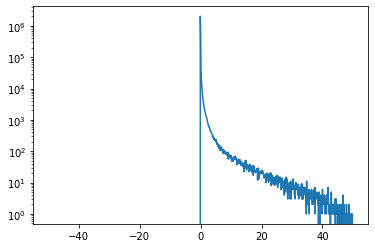

In [52]:
# levels = [-30,-20,-10,-5,-3,-2,-1,-0.5,-0.1,0,0.1,0.5,1,2,3,5,10,20,30]
levels = np.arange(-50,50.1,0.1)
# rr.plot.hist(bins=levels)
hist_rr, bins = np.histogram(rr.squeeze(), bins=levels, range=(-50,50))
plt.plot(bins[:-1], hist_rr)
plt.yscale('log')

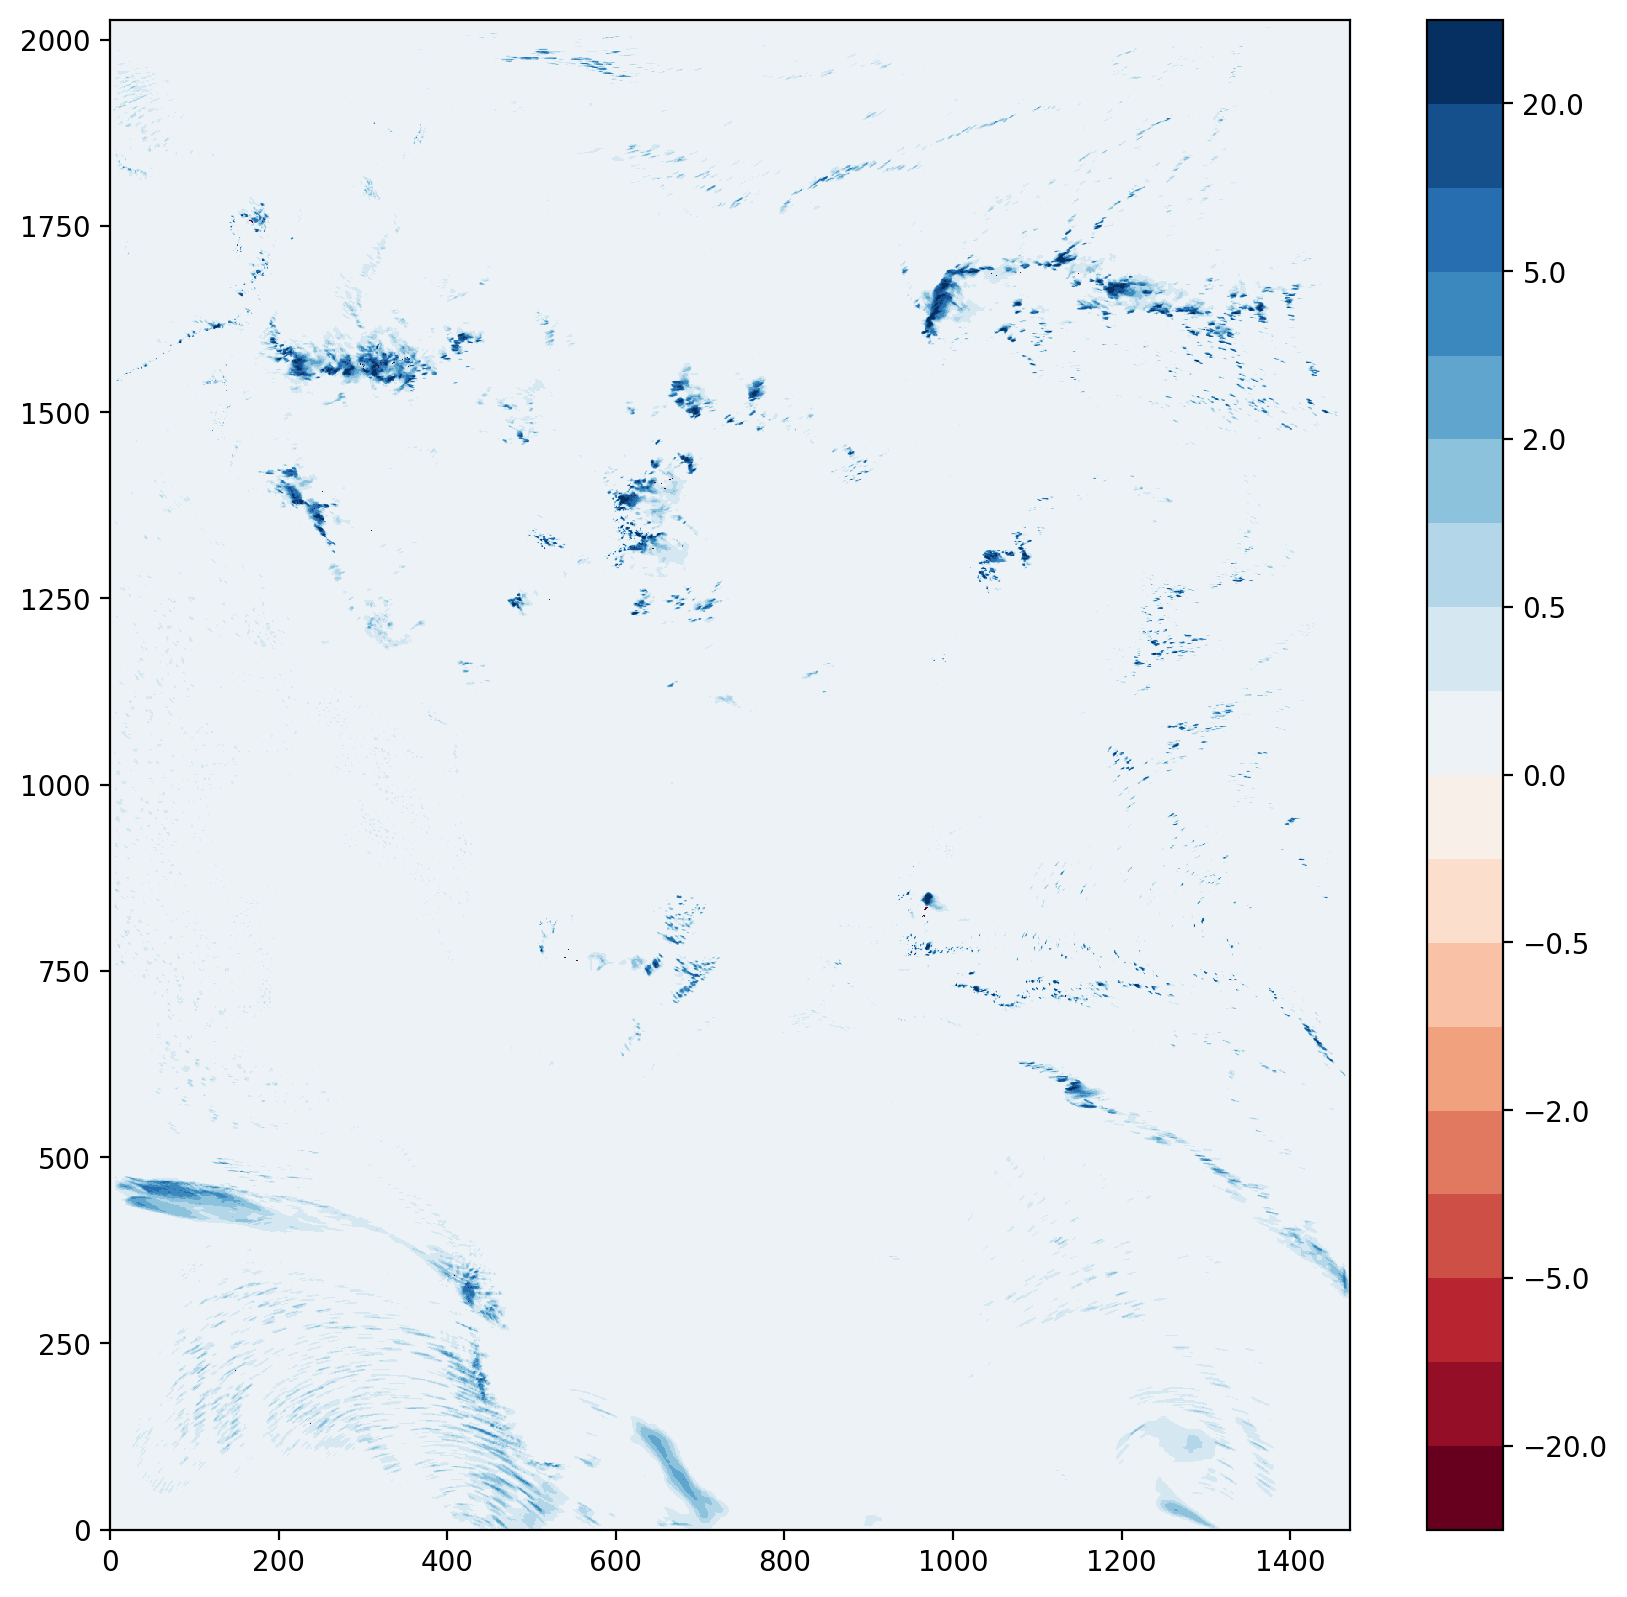

In [41]:
fig = plt.figure(figsize=[10,10], dpi=200)

levels = [-30,-20,-10,-5,-3,-2,-1,-0.5,-0.1,0,0.1,0.5,1,2,3,5,10,20,30]
norm = mpl.colors.BoundaryNorm(boundaries=levels, ncolors=256)

# rr.squeeze().plot.pcolormesh(norm=norm, cmap='RdBu')
plt.pcolormesh(rr.squeeze(), norm=norm, cmap='RdBu')
plt.colorbar()

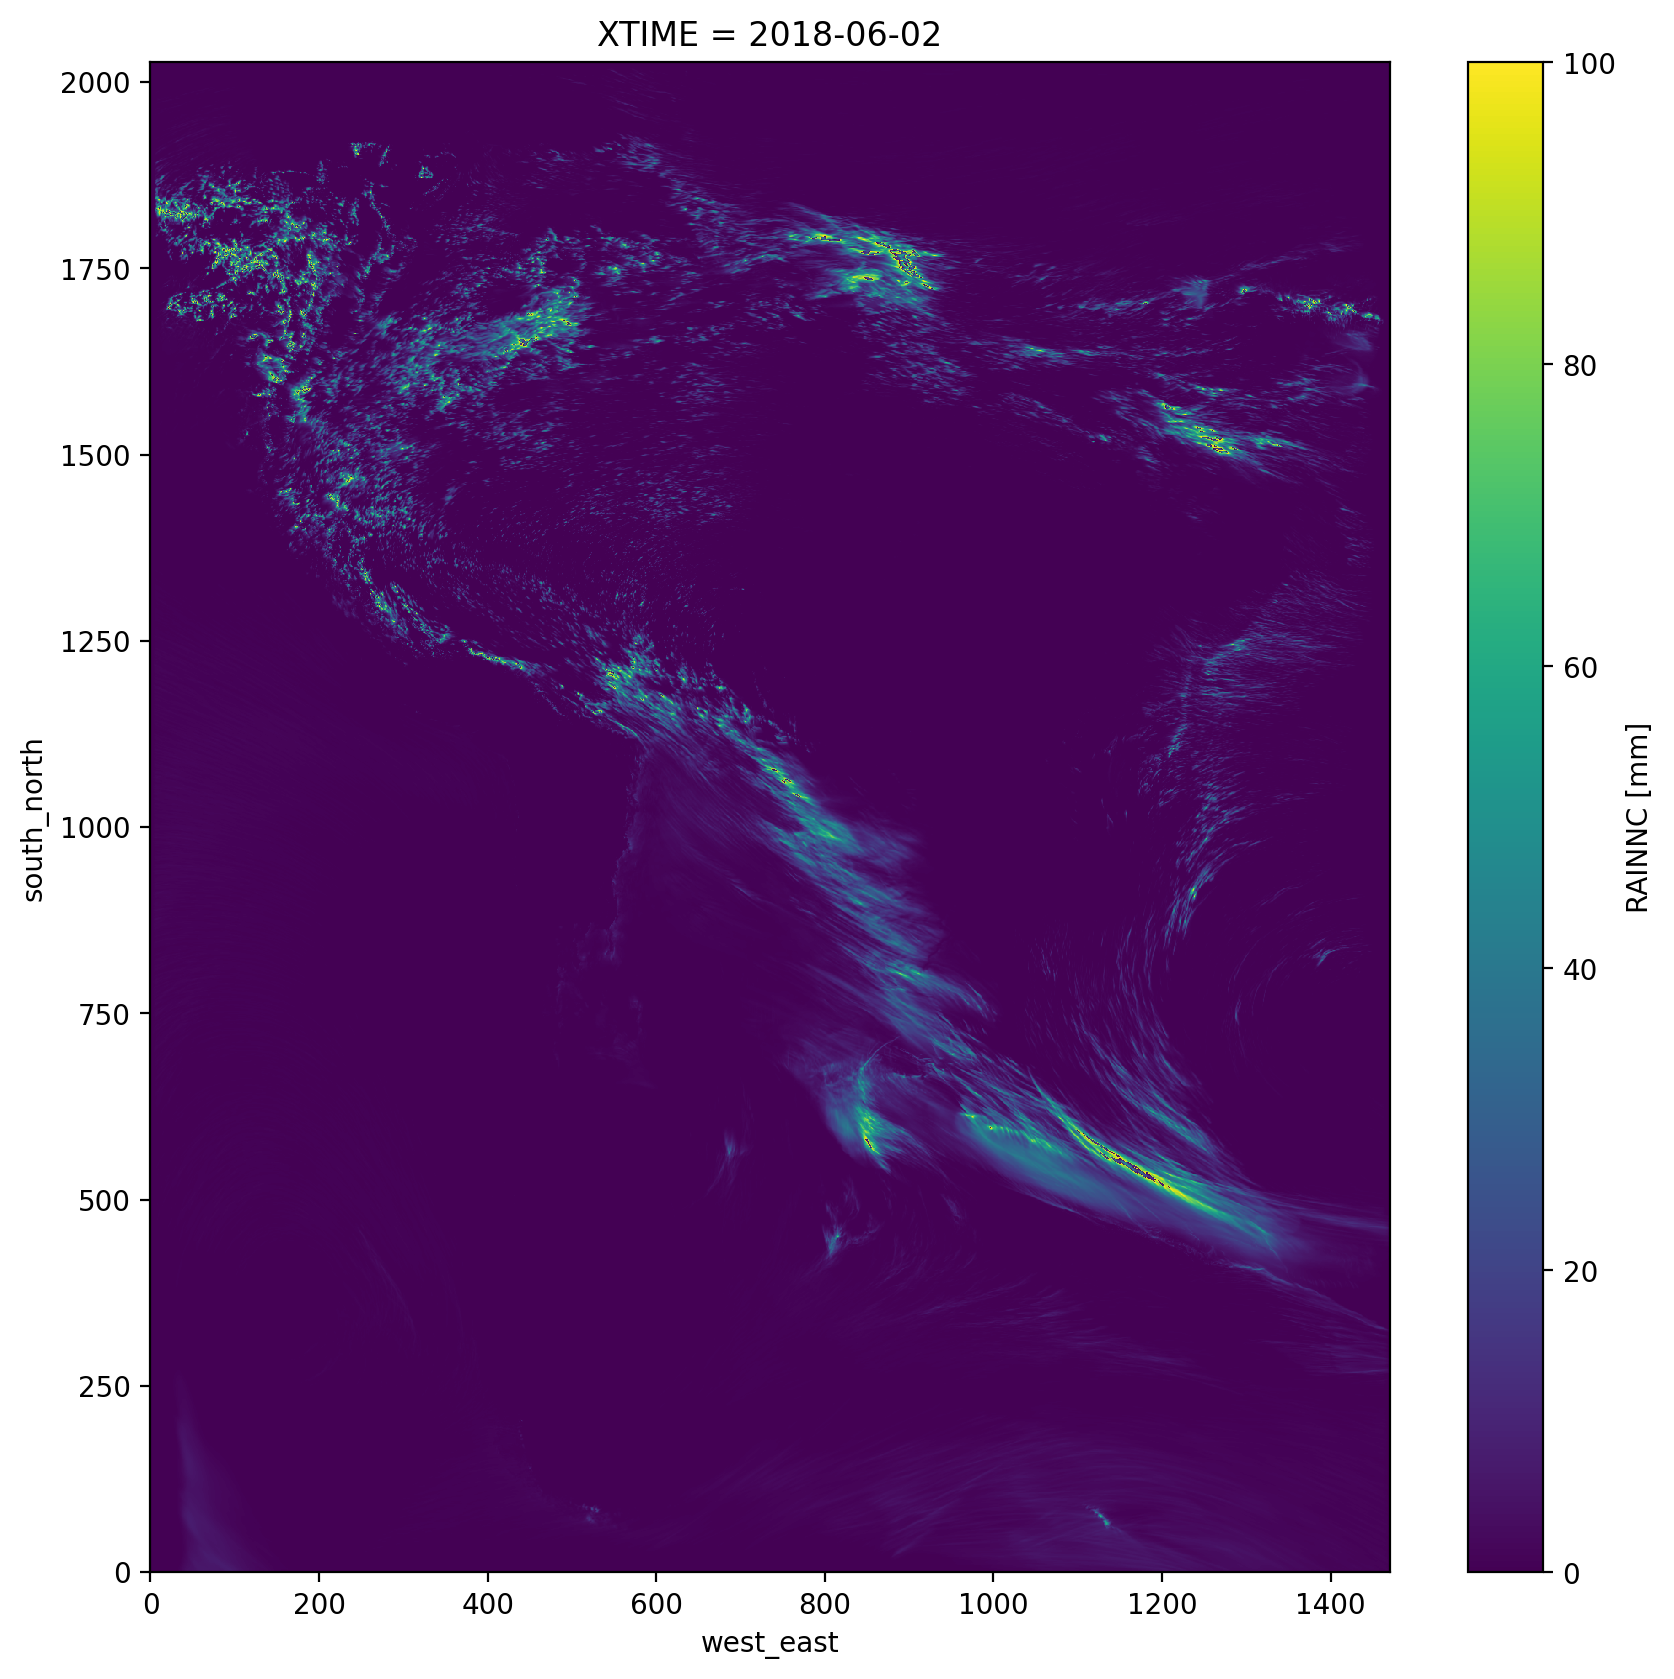

In [47]:
ds0 = xr.open_dataset(f'{datadir}wrfout_d01_2018-06-02_00:00:00')
fig = plt.figure(figsize=[10,10], dpi=200)
ds0.RAINNC.plot(vmin=0, vmax=100, cmap='viridis')
# ds0.RAINNC.max()